<a href="https://colab.research.google.com/github/yenngoc1809/edm-student-prediction/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from imblearn.over_sampling import SMOTE
%pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.0 MB/s eta 0:00:00


In [ ]:
%pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
file_path = "/content/data_encoded.csv"
data = pd.read_csv(file_path)

## **split data and balance**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek # Import SMOTETomek
%pip install optuna

X = data.drop(columns=['Academic_Performance']) # Independent variables
y = data['Academic_Performance']  # Target variable


# Split data first (to avoid leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Print class distribution before balancing
print("Class distribution before SMOTE:")
print(y_train.value_counts())


# # Apply SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Apply SMOTETomek to balance classes and clean overlaps
smote_tomek = SMOTETomek(sampling_strategy=1.0, random_state=42, n_jobs=-1)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("\nClass distribution after SMOTE:")
print(y_train_balanced.value_counts())

Class distribution before SMOTE:
Academic_Performance
1    702
0     94
Name: count, dtype: int64

Class distribution after SMOTE:
Academic_Performance
1    698
0    698
Name: count, dtype: int64


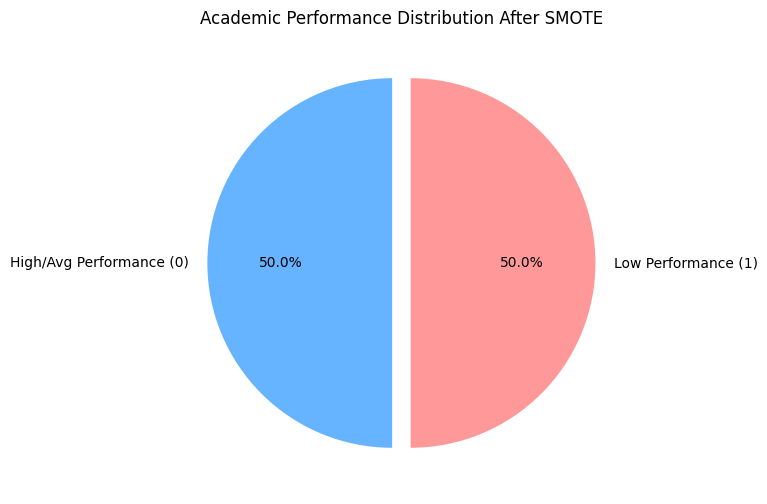

In [ ]:
import matplotlib.pyplot as plt

# Count class distribution after balancing
counts = y_train_balanced.value_counts().sort_index()

# Create labels for the pie chart
labels = ['High/Avg Performance (0)', 'Low Performance (1)']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05))
plt.title('Academic Performance Distribution After SMOTE')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


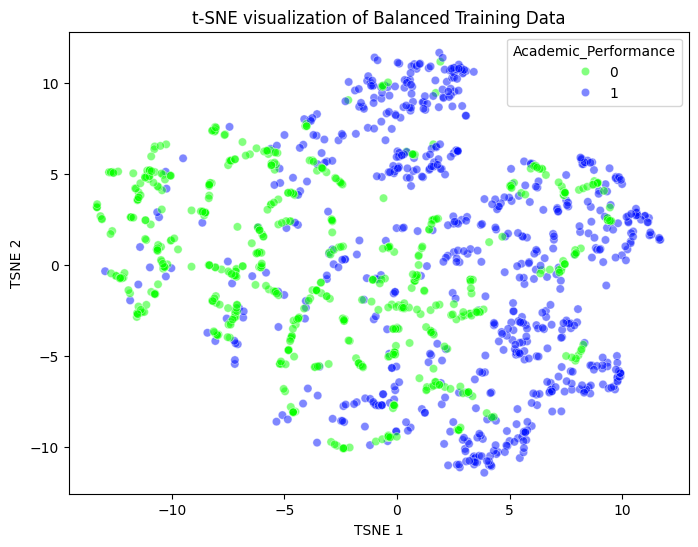

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Define SEED for reproducibility
SEED = 42
np.random.seed(SEED) # Set numpy seed for reproducibility

# Ensure X_train_balanced and y_train_balanced are available
# These are created in cell KjVeoc1vTPjN

# Scale the balanced training data
# It's generally better to scale *after* SMOTE
scaler_tsne = StandardScaler()
X_train_balanced_scaled = scaler_tsne.fit_transform(X_train_balanced)


# Perform t-SNE for dimensionality reduction
# Reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=300)
X_train_tsne = tsne.fit_transform(X_train_balanced_scaled)

# Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=X_train_tsne, columns=['TSNE_1', 'TSNE_2'])
# Ensure y_train_balanced is a Series or array before accessing .values
if isinstance(y_train_balanced, pd.Series):
    tsne_df['Academic_Performance'] = y_train_balanced.values
else:
    tsne_df['Academic_Performance'] = y_train_balanced


# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='Academic_Performance',
    palette=sns.color_palette('hsv', 2), # Assuming 2 classes
    data=tsne_df,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE visualization of Balanced Training Data')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

# Optional: You can also try PCA if t-SNE takes too long or for comparison
# pca = PCA(n_components=2, random_state=SEED)
# X_train_pca = pca.fit_transform(X_train_balanced_scaled)

# pca_df = pd.DataFrame(data=X_train_pca, columns=['PCA_1', 'PCA_2'])
# if isinstance(y_train_balanced, pd.Series):
#     pca_df['Academic_Performance'] = y_train_balanced.values
# else:
#     pca_df['Academic_Performance'] = y_train_balanced

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     x='PCA_1', y='PCA_2',
#     hue='Academic_Performance',
#     palette=sns.color_palette('hsv', 2),
#     data=pca_df,
#     legend='full',
#     alpha=0.5
# )
# plt.title('PCA visualization of Balanced Training Data')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.show()

## **decision tree**

In [ ]:
# import optuna
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

# def objective(trial):
#     # Parameters to be optimized
#     max_depth = trial.suggest_int('max_depth', 3, 20)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

#     # Thêm tham số class_weight cho class 0
#     weight_0 = trial.suggest_float('weight_0', 1.0, 10.0)  # trọng số cho class 0

#     # Split train/val từ balanced training set
#     X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#         X_train_balanced, y_train_balanced, test_size=0.2, stratify=y_train_balanced, random_state=42
#     )

#     # Train model
#     model = DecisionTreeClassifier(
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         criterion=criterion,
#         class_weight={0: weight_0, 1: 1.0},
#         random_state=42
#     )
#     model.fit(X_train_split, y_train_split)
#     y_val_pred = model.predict(X_val_split)

#     # Trả về F1 cho class 0
#     f1_class0 = f1_score(y_val_split, y_val_pred, pos_label=0)
#     return f1_class0


import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

def objective(trial):
    # Parameters
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    weight_0 = trial.suggest_float('weight_0', 1.0, 10.0)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        class_weight={0: weight_0, 1: 1.0},
        random_state=42
    )

    # Stratified 5-Fold CV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_balanced, y_train_balanced,
                             cv=cv, scoring=make_scorer(f1_score, pos_label=0))

    return scores.mean()  # trung bình F1 cho class 0

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best F1 for class 0:", study.best_value)



[I 2025-08-18 07:51:31,287] A new study created in memory with name: no-name-0632a361-6a66-4e47-96e0-ce7b79c6c6ee
[I 2025-08-18 07:51:31,401] Trial 0 finished with value: 0.8399553933353104 and parameters: {'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 8, 'criterion': 'entropy', 'weight_0': 7.191892484881371}. Best is trial 0 with value: 0.8399553933353104.
[I 2025-08-18 07:51:31,516] Trial 1 finished with value: 0.8367335155611657 and parameters: {'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 2, 'criterion': 'gini', 'weight_0': 8.001180136502958}. Best is trial 0 with value: 0.8399553933353104.
[I 2025-08-18 07:51:31,628] Trial 2 finished with value: 0.8451314952689968 and parameters: {'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 5, 'criterion': 'entropy', 'weight_0': 9.623325197047603}. Best is trial 2 with value: 0.8451314952689968.
[I 2025-08-18 07:51:31,752] Trial 3 finished with value: 0.8376608204699352 and parameters: {'max_depth'

Best params: {'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 5, 'criterion': 'entropy', 'weight_0': 2.403933245886809}
Best F1 for class 0: 0.8948341749080292


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best F1 for class 0:", study.best_value)


[I 2025-08-18 07:51:39,111] A new study created in memory with name: no-name-4df3ffa6-8fc1-43eb-8c31-0849b7a517b3
[I 2025-08-18 07:51:39,178] Trial 0 finished with value: 0.7698407057906771 and parameters: {'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 4, 'criterion': 'gini', 'weight_0': 8.215446939804117}. Best is trial 0 with value: 0.7698407057906771.
[I 2025-08-18 07:51:39,240] Trial 1 finished with value: 0.8085523928978248 and parameters: {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10, 'criterion': 'gini', 'weight_0': 6.725327551854855}. Best is trial 1 with value: 0.8085523928978248.
[I 2025-08-18 07:51:39,315] Trial 2 finished with value: 0.8340549441392264 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 10, 'criterion': 'gini', 'weight_0': 8.927045703714267}. Best is trial 2 with value: 0.8340549441392264.
[I 2025-08-18 07:51:39,394] Trial 3 finished with value: 0.8391581519968287 and parameters: {'max_depth': 17, 'm

Best params: {'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 3, 'criterion': 'entropy', 'weight_0': 1.5553342599232514}
Best F1 for class 0: 0.9009937285127071


In [ ]:
best_params = study.best_params

dtc = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    criterion=best_params['criterion'],
    class_weight='balanced',
    random_state=42,

)
dtc.fit(X_train_balanced, y_train_balanced)
y_pred = dtc.predict(X_test)

print(f"\nDecision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Decision Tree Accuracy: 0.8400

Confusion Matrix:
 [[ 10  13]
 [ 19 158]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.43      0.38        23
           1       0.92      0.89      0.91       177

    accuracy                           0.84       200
   macro avg       0.63      0.66      0.65       200
weighted avg       0.86      0.84      0.85       200



In [ ]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# True labels
true_labels_test = y_test.values

# Check Decision Tree model
if 'dtc' in locals() and isinstance(dtc, DecisionTreeClassifier):
    predicted_labels_test = dtc.predict(X_test)

    # --- Evaluate Fairness for Gender ---
    print("--- Fairness Evaluation (Sensitive Attribute: Gender) ---")
    sensitive_features_gender_test = X_test['Gender'].values

    metric_frame_gender = MetricFrame(
        metrics={
            "accuracy": accuracy_score,
            "selection_rate": lambda y_true, y_pred: y_pred.mean(),
            "true_positive_rate": lambda y_true, y_pred: classification_report(
                y_true, y_pred, output_dict=True
            ).get('1', {}).get('recall', 0.0),
            "false_positive_rate": lambda y_true, y_pred: (
                confusion_matrix(y_true, y_pred).ravel()[1] /
                (confusion_matrix(y_true, y_pred).ravel()[1] + confusion_matrix(y_true, y_pred).ravel()[0])
                if confusion_matrix(y_true, y_pred).ravel()[1] + confusion_matrix(y_true, y_pred).ravel()[0] > 0 else 0.0
            )
        },
        y_true=true_labels_test,
        y_pred=predicted_labels_test,
        sensitive_features=sensitive_features_gender_test
    )

    # Metrics per group
    print("\nMetrics by Gender Group:")
    print(metric_frame_gender.by_group)

    # Δ (difference) across groups
    print("\n--- Δ (Difference between groups) ---")
    print(metric_frame_gender.difference())

else:
    print("Decision Tree model 'dtc' not found or is not a DecisionTreeClassifier.")
    print("Please run the Decision Tree training cell first.")


--- Fairness Evaluation (Sensitive Attribute: Gender) ---

Metrics by Gender Group:
                     accuracy  selection_rate  true_positive_rate  \
sensitive_feature_0                                                 
0                    0.838028        0.880282            0.892308   
1                    0.844828        0.793103            0.893617   

                     false_positive_rate  
sensitive_feature_0                       
0                               0.750000  
1                               0.363636  

--- Δ (Difference between groups) ---
accuracy               0.006799
selection_rate         0.087178
true_positive_rate     0.001309
false_positive_rate    0.386364
dtype: float64


AUC Score: 0.6744


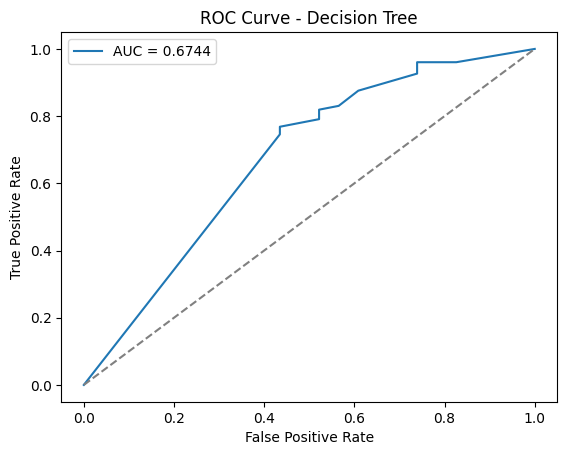

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities instead of class labels
y_prob_rf = dtc.predict_proba(X_test)[:, 1]  # Get probability for class 1

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob_rf)
print(f"AUC Score: {auc_score:.4f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Baseline (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

## **Xgboost**

In [ ]:
import xgboost as xgb
print(xgb.__version__)

3.0.4


In [ ]:
pip install --upgrade xgboost


In [ ]:
import xgboost as xgb
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

SEED = 42

def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": "gbtree",
        "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "seed": SEED,
        "verbosity": 0
    }

    num_boost_round = trial.suggest_int("n_estimators", 100, 500)
    weight_0 = trial.suggest_float("weight_0", 1.0, 10.0)

    # Stratified 5-Fold CV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    f1_scores = []

    for train_idx, valid_idx in cv.split(X_train_balanced, y_train_balanced):
        # Dùng iloc để tránh KeyError
        X_tr, X_val = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[valid_idx]
        y_tr, y_val = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[valid_idx]

        # Sample weight cho class 0
        sample_weight = np.where(y_tr == 0, weight_0, 1.0)

        dtrain = xgb.DMatrix(X_tr, label=y_tr, weight=sample_weight)
        dvalid = xgb.DMatrix(X_val, label=y_val)

        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=[(dvalid, "eval")],
            early_stopping_rounds=20,
            verbose_eval=False
        )

        preds = model.predict(dvalid)
        preds_binary = (preds > 0.5).astype(int)
        f1_scores.append(f1_score(y_val, preds_binary, pos_label=0))

    return np.mean(f1_scores)

# Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print(f"Best F1(class 0): {study.best_value:.4f}")


[I 2025-08-18 07:52:41,172] A new study created in memory with name: no-name-0577b33c-3474-414f-9062-70c5e0736969
[I 2025-08-18 07:52:49,870] Trial 0 finished with value: 0.8313257083781271 and parameters: {'lambda': 7.142780911003751, 'alpha': 3.605927318890785, 'colsample_bytree': 0.5927443170569504, 'subsample': 0.8351042505241273, 'learning_rate': 0.0025479400487625403, 'max_depth': 5, 'n_estimators': 444, 'weight_0': 2.4239665743912435}. Best is trial 0 with value: 0.8313257083781271.
[I 2025-08-18 07:52:50,975] Trial 1 finished with value: 0.9289973254452452 and parameters: {'lambda': 0.10698866115902994, 'alpha': 0.013870733725775694, 'colsample_bytree': 0.745663223046183, 'subsample': 0.8022444182422781, 'learning_rate': 0.13175977403478806, 'max_depth': 10, 'n_estimators': 136, 'weight_0': 9.754853979114724}. Best is trial 1 with value: 0.9289973254452452.
[I 2025-08-18 07:52:52,546] Trial 2 finished with value: 0.8400057513747846 and parameters: {'lambda': 7.241027931716248, 

Best parameters: {'lambda': 2.4332766317455468, 'alpha': 0.8139938150358675, 'colsample_bytree': 0.8076959635228883, 'subsample': 0.6843780671090521, 'learning_rate': 0.09333602765348313, 'max_depth': 7, 'n_estimators': 284, 'weight_0': 1.080227413259195}
Best F1(class 0): 0.9415



Test Accuracy: 0.8850

Confusion Matrix:
 [[  8  15]
 [  8 169]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.35      0.41        23
           1       0.92      0.95      0.94       177

    accuracy                           0.89       200
   macro avg       0.71      0.65      0.67       200
weighted avg       0.87      0.89      0.88       200



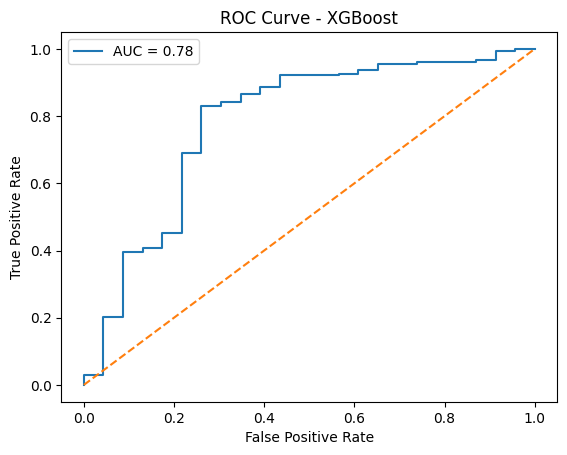

In [ ]:



best_params = study.best_params
weight_0 = best_params.pop("weight_0")  # lấy ra và bỏ khỏi dict params XGBoost

# Thêm các tham số cố định
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": SEED,
    "use_label_encoder": False
})

final_model = xgb.XGBClassifier(**best_params)

# Tạo sample_weight theo weight_0
sample_weight = np.where(y_train_balanced == 0, weight_0, 1.0)

# Fit model với sample_weight
final_model.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weight)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC–AUC
y_prob = final_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb  # Import xgboost to check model type

# Get the true labels from the test set
true_labels_test = y_test.values

# Check if final_model exists and is an XGBoost classifier
if 'final_model' in locals() and isinstance(final_model, xgb.XGBClassifier):
    predicted_labels_test = final_model.predict(X_test)

    # --- Evaluate Fairness for Gender ---
    print("--- Fairness Evaluation (Sensitive Attribute: Gender) ---")
    sensitive_features_gender_test = X_test['Gender'].values

    metric_frame_gender = MetricFrame(
        metrics={
            "accuracy": accuracy_score,
            "selection_rate": lambda y_true, y_pred: y_pred.mean(),
            "true_positive_rate": lambda y_true, y_pred: classification_report(
                y_true, y_pred, output_dict=True
            ).get('1', {}).get('recall', 0.0),
            "false_positive_rate": lambda y_true, y_pred: (
                confusion_matrix(y_true, y_pred).ravel()[1] /
                (confusion_matrix(y_true, y_pred).ravel()[1] + confusion_matrix(y_true, y_pred).ravel()[0])
                if confusion_matrix(y_true, y_pred).ravel()[1] + confusion_matrix(y_true, y_pred).ravel()[0] > 0 else 0.0
            )
        },
        y_true=true_labels_test,
        y_pred=predicted_labels_test,
        sensitive_features=sensitive_features_gender_test
    )

    # Metrics by group
    print("\nMetrics by Gender Group:")
    print(metric_frame_gender.by_group)

    # Δ (difference between groups)
    print("\n--- Δ (Difference between groups) ---")
    print(metric_frame_gender.difference())



else:
    print("XGBoost final_model not found or is not an XGBoost classifier.")
    print("Please run the XGBoost training cell first.")


--- Fairness Evaluation (Sensitive Attribute: Gender) ---

Metrics by Gender Group:
                     accuracy  selection_rate  true_positive_rate  \
sensitive_feature_0                                                 
0                    0.887324        0.971831            0.969231   
1                    0.879310        0.793103            0.914894   

                     false_positive_rate  
sensitive_feature_0                       
0                               1.000000  
1                               0.272727  

--- Δ (Difference between groups) ---
accuracy               0.008014
selection_rate         0.178728
true_positive_rate     0.054337
false_positive_rate    0.727273
dtype: float64


In [ ]:
import joblib
joblib.dump(final_model, 'model.pkl')


['model.pkl']

Calculating SHAP values for XGBoost...
SHAP values calculated for XGBoost.
Generating SHAP summary plot for XGBoost...


/tmp/ipython-input-3610917422.py:57: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test_sample_xgb_df, feature_names=feature_names)


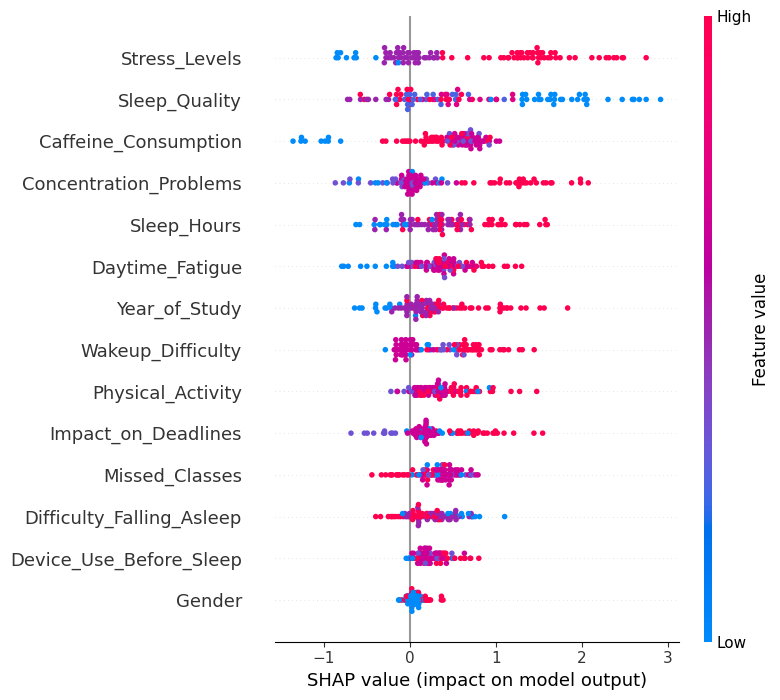

In [ ]:
# Calculate and visualize SHAP values for the XGBoost model
try:
    # Ensure the final_model from the XGBoost section exists and is an XGBoost classifier
    # The variable name for the final XGBoost model is 'final_model' in the previous cells
    if 'final_model' in locals() and isinstance(final_model, xgb.XGBClassifier):

        # Convert scaled test data to numpy array for SHAP (if not already)
        # X_test is already a numpy array after scaling in cell REomaJgBVkWX before ANN training
        # If X_test is still a DataFrame, convert it to numpy
        if isinstance(X_test, pd.DataFrame):
            X_test_np = X_test.values
        else:
            X_test_np = X_test

        # Choose a background dataset for the Explainer. Using a small sample of the training data is common.
        # X_train_balanced is already a numpy array after SMOTE in cell KjVeoc1vTPbN
        # If X_train_balanced is still a DataFrame, convert it to numpy
        if isinstance(X_train_balanced, pd.DataFrame):
            background_data_np = X_train_balanced.sample(100, random_state=SEED).values # Use sample for DataFrame and convert to numpy
        else:
            background_data_np = X_train_balanced[np.random.choice(X_train_balanced.shape[0], 100, replace=False)]


        # Create a SHAP Explainer
        # Using TreeExplainer for tree-based models like XGBoost
        import shap
        explainer_xgb = shap.TreeExplainer(final_model)

        # Calculate SHAP values for a sample of the test data
        # Using a small sample of the test data for faster computation
        shap_sample_indices_xgb = np.random.choice(X_test_np.shape[0], min(100, X_test_np.shape[0]), replace=False)
        X_test_sample_xgb = X_test_np[shap_sample_indices_xgb]
        # y_test_sample_xgb = y_test.iloc[shap_sample_indices_xgb] # Ensure y_test is aligned if needed for plotting


        # Compute SHAP values
        print("Calculating SHAP values for XGBoost...")
        # For TreeExplainer, shap_values will directly correspond to the output of the model's predict method
        # For binary classification, shap_values will have shape (n_samples, n_features) for the log-odds output
        # If you want values for probabilities, you might need a different explainer or approach
        shap_values_xgb = explainer_xgb.shap_values(X_test_sample_xgb)
        print("SHAP values calculated for XGBoost.")

        # Get the original feature names
        feature_names = X.columns.tolist() # X was the original DataFrame before splitting and scaling

        # Convert X_test_sample_xgb back to a DataFrame with feature names for plotting
        X_test_sample_xgb_df = pd.DataFrame(X_test_sample_xgb, columns=feature_names)

        # Plot SHAP summary plot
        print("Generating SHAP summary plot for XGBoost...")
        # For binary classification with TreeExplainer, shap_values is a list of arrays (one per class)
        # We plot the SHAP values for the positive class (class 1)
        if isinstance(shap_values_xgb, list):
             shap.summary_plot(shap_values_xgb[1], X_test_sample_xgb_df, feature_names=feature_names)
        else: # If shap_values is a single array (e.g., for regression or base value explanation)
             shap.summary_plot(shap_values_xgb, X_test_sample_xgb_df, feature_names=feature_names)


    else:
        print("XGBoost final_model not found or is not an XGBoost classifier.")
        print("Please run the XGBoost training cell first.")

except Exception as e:
    print(f"An error occurred during SHAP calculation or plotting for XGBoost: {e}")

In [ ]:
%pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.4 MB/s eta 0:00:00


In [ ]:
# import dice_ml
# import pandas as pd

# # Ensure the final_model and X_test are available
# if 'final_model' in locals() and isinstance(final_model, xgb.XGBClassifier):

#     # Create a DiCE data object
#     # X is the original DataFrame before splitting and balancing, used to get feature information
#     d = dice_ml.Data(dataframe=X, continuous_features=X.columns.tolist(), outcome_name='Academic_Performance')

#     # Create a DiCE model object
#     # Use the trained XGBoost model
#     m = dice_ml.Model(model=final_model, backend='sklearn')

#     # Create a DiCE explainer object
#     # Specify the data and model
#     exp = dice_ml.Dice(d, m, method='random')

#     # Generate counterfactuals for a sample of test data
#     # We want to find counterfactuals for instances predicted as class 1 (Low Performance)
#     # and see what changes would make them predicted as class 0 (High/Avg Performance).

#     # Select a sample of instances from the test set that were predicted as class 1
#     X_test_class_1_indices = X_test[final_model.predict(X_test) == 1].index
#     if len(X_test_class_1_indices) > 0:
#         # Select a small sample for demonstration
#         query_instances = X_test.loc[X_test_class_1_indices].sample(min(5, len(X_test_class_1_indices)), random_state=SEED)

#         # Generate counterfactuals
#         # target_class=0 means we want to change the prediction to class 0
#         dice_exp = exp.generate_counterfactuals(query_instances, total_CFs=3, desired_class="opposite")

#         # Visualize the counterfactuals
#         dice_exp.visualize_as_dataframe()

#     else:
#         print("No instances predicted as class 1 in the test set to generate counterfactuals for.")

# else:
#     print("XGBoost final_model not found or is not an XGBoost classifier.")
#     print("Please run the XGBoost training cell first.")

# LightBGM

Generate Python code to train and evaluate a LightGBM model for classification, including hyperparameter tuning with Optuna, and visualize the results.

## Import libraries

### Subtask:
Import necessary libraries for LightGBM, Optuna, data splitting, and evaluation.


**Reasoning**:
Import the necessary libraries for LightGBM, Optuna, data splitting, and evaluation as instructed.



In [ ]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## Define objective function

### Subtask:
Create an Optuna objective function for LightGBM to optimize hyperparameters based on validation accuracy.


**Reasoning**:
Define the Optuna objective function for LightGBM hyperparameter tuning.



In [ ]:
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

SEED = 42

def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "random_state": SEED,
        "n_jobs": -1,
        "verbose": -1,
        "is_unbalance": True
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    f1_scores = []

    for train_idx, val_idx in cv.split(X_train_balanced, y_train_balanced):
        # Dùng iloc vì X_train_balanced và y_train_balanced là DataFrame/Series
        X_tr, X_val = X_train_balanced.iloc[train_idx], X_train_balanced.iloc[val_idx]
        y_tr, y_val = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[val_idx]

        model = lgb.LGBMClassifier(**params)
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        f1_scores.append(f1_score(y_val, y_val_pred, pos_label=0))

    return np.mean(f1_scores)

# Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print(f"Best F1(class 0): {study.best_value:.4f}")


[I 2025-08-18 07:57:34,680] A new study created in memory with name: no-name-a615f7c6-2895-4c95-97cc-5a382fe8302c
[I 2025-08-18 07:57:35,824] Trial 0 finished with value: 0.9326493881545457 and parameters: {'n_estimators': 667, 'learning_rate': 0.05024524691927121, 'max_depth': 6, 'subsample': 0.80549775425473, 'colsample_bytree': 0.6575641931426619, 'lambda_l1': 0.23718454558117766, 'lambda_l2': 0.006246479100835101}. Best is trial 0 with value: 0.9326493881545457.
[I 2025-08-18 07:57:37,288] Trial 1 finished with value: 0.9322413885874485 and parameters: {'n_estimators': 447, 'learning_rate': 0.05164061223570151, 'max_depth': 10, 'subsample': 0.6233997360027732, 'colsample_bytree': 0.5639086680092719, 'lambda_l1': 0.011179648422471208, 'lambda_l2': 0.002143701339107571}. Best is trial 0 with value: 0.9326493881545457.
[I 2025-08-18 07:57:40,121] Trial 2 finished with value: 0.9300089713331721 and parameters: {'n_estimators': 921, 'learning_rate': 0.0941217963273425, 'max_depth': 8, '

Best parameters: {'n_estimators': 793, 'learning_rate': 0.0344035754826469, 'max_depth': 4, 'subsample': 0.8577947449580269, 'colsample_bytree': 0.8870803606922583, 'lambda_l1': 0.0006652952540657331, 'lambda_l2': 9.3175786806307}
Best F1(class 0): 0.9374


**Reasoning**:
Import the necessary libraries for LightGBM, Optuna, data splitting, and evaluation as instructed.

**Reasoning**:
Define the Optuna objective function for LightGBM hyperparameter tuning.

## Run Optuna Study

### Subtask:
Execute the Optuna study to find the best hyperparameters for the LightGBM model.

**Reasoning**:
Execute the Optuna study to find the best hyperparameters for the LightGBM model using the defined objective function.

In [ ]:
study_lgbm = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=SEED))
study_lgbm.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best parameters for LightGBM:", study_lgbm.best_params)
print(f"Best validation accuracy for LightGBM: {study_lgbm.best_value:.4f}")

[I 2025-08-18 07:58:29,669] A new study created in memory with name: no-name-01afa14f-6f3c-4707-85b6-2f19089d8f39


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-08-18 07:58:31,463] Trial 0 finished with value: 0.9297676665922296 and parameters: {'n_estimators': 437, 'learning_rate': 0.2536999076681772, 'max_depth': 8, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'lambda_l1': 2.5348407664333426e-07, 'lambda_l2': 3.3323645788192616e-08}. Best is trial 0 with value: 0.9297676665922296.
[I 2025-08-18 07:58:33,615] Trial 1 finished with value: 0.932289688851697 and parameters: {'n_estimators': 880, 'learning_rate': 0.07725378389307355, 'max_depth': 8, 'subsample': 0.5102922471479012, 'colsample_bytree': 0.9849549260809971, 'lambda_l1': 0.31044435499483225, 'lambda_l2': 8.148018307012941e-07}. Best is trial 1 with value: 0.932289688851697.
[I 2025-08-18 07:58:34,242] Trial 2 finished with value: 0.9342457794605308 and parameters: {'n_estimators': 263, 'learning_rate': 0.018659959624904916, 'max_depth': 5, 'subsample': 0.762378215816119, 'colsample_bytree': 0.7159725093210578, 'lambda_l1': 4.17890272377219e-06, 'la

## Train Final Model and Evaluate

### Subtask:
Train the LightGBM model on the full balanced training data using the best hyperparameters and evaluate it on the test set.

**Reasoning**:
Train the final LightGBM model using the best hyperparameters found by Optuna and evaluate its performance on the test set, providing accuracy, confusion matrix, classification report, and ROC-AUC.


LightGBM Test Accuracy: 0.9000

LightGBM Confusion Matrix:
 [[ 13  10]
 [ 10 167]]

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57        23
           1       0.94      0.94      0.94       177

    accuracy                           0.90       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.90      0.90      0.90       200


LightGBM Test ROC–AUC: 0.8035


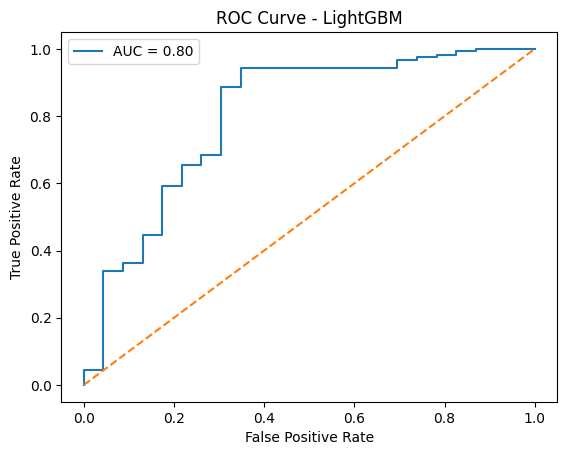

In [ ]:
# Train final model on full balanced train split using best params
best_params_lgbm = study_lgbm.best_params
# Ensure is_unbalance is included in the final model parameters
best_params_lgbm["is_unbalance"] = True

final_model_lgbm = lgb.LGBMClassifier(**best_params_lgbm)
final_model_lgbm.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_lgbm = final_model_lgbm.predict(X_test)

# Evaluate
print(f"\nLightGBM Test Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print("\nLightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# ROC–AUC
y_prob_lgbm = final_model_lgbm.predict_proba(X_test)[:, 1]
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
print(f"\nLightGBM Test ROC–AUC: {auc_lgbm:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, label=f'AUC = {auc_lgbm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb  # Import lightgbm to check model type

# We will evaluate fairness based on each sensitive attribute separately.

# Get the true labels from the test set
true_labels_test = y_test.values

# Get the predictions from the final LightGBM model on the test set
if 'final_model_lgbm' in locals() and isinstance(final_model_lgbm, lgb.LGBMClassifier):
    predicted_labels_test = final_model_lgbm.predict(X_test)

    # --- Evaluate Fairness for Gender ---
    print("--- Fairness Evaluation (Sensitive Attribute: Gender) ---")
    sensitive_features_gender_test = X_test['Gender'].values

    metric_frame_gender = MetricFrame(
        metrics={
            "accuracy": accuracy_score,
            "selection_rate": lambda y_true, y_pred: y_pred.mean(),
            "true_positive_rate": lambda y_true, y_pred: classification_report(
                y_true, y_pred, output_dict=True
            ).get("1", {}).get("recall", 0.0),
            "false_positive_rate": lambda y_true, y_pred: (
                0.0
                if confusion_matrix(y_true, y_pred).ravel()[1]
                + confusion_matrix(y_true, y_pred).ravel()[0]
                == 0
                else confusion_matrix(y_true, y_pred).ravel()[1]
                / (
                    confusion_matrix(y_true, y_pred).ravel()[1]
                    + confusion_matrix(y_true, y_pred).ravel()[0]
                )
            ),
        },
        y_true=true_labels_test,
        y_pred=predicted_labels_test,
        sensitive_features=sensitive_features_gender_test,
    )

    print("\nMetrics by Gender Group:")
    print(metric_frame_gender.by_group)

        # --- Calculate Delta (max difference between groups) ---
    print("\n--- ΔMetrics (Disparities between Gender Groups) ---")
    for metric_name in metric_frame_gender.by_group.columns:
        delta_value = (
            metric_frame_gender.by_group[metric_name].max()
            - metric_frame_gender.by_group[metric_name].min()
        )
        print(f"Δ{metric_name}: {delta_value:.4f}")

else:
    print("LightGBM final_model_lgbm not found or is not a LightGBM classifier.")
    print("Please run the LightGBM training cell first.")


--- Fairness Evaluation (Sensitive Attribute: Gender) ---

Metrics by Gender Group:
                     accuracy  selection_rate  true_positive_rate  \
sensitive_feature_0                                                 
0                    0.901408        0.929577            0.953846   
1                    0.896552        0.775862            0.914894   

                     false_positive_rate  
sensitive_feature_0                       
0                               0.666667  
1                               0.181818  

--- ΔMetrics (Disparities between Gender Groups) ---
Δaccuracy: 0.0049
Δselection_rate: 0.1537
Δtrue_positive_rate: 0.0390
Δfalse_positive_rate: 0.4848


## LightGBM Feature Importance

### Subtask:
Calculate and display feature importances for the LightGBM model.

**Reasoning**:
Calculate and display feature importances from the trained LightGBM model to understand which features contributed most to the predictions.

## LightGBM SHAP Values

### Subtask:
Calculate and visualize SHAP values for the LightGBM model to explain its predictions.

**Reasoning**:
Calculate and visualize SHAP values for the LightGBM model to understand the contribution of each feature to the model's output for individual predictions and overall.

In [ ]:
# Calculate and visualize SHAP values for the LightGBM model
try:
    # Ensure the final_model_lgbm from the LightGBM section exists and is a LightGBM classifier
    if 'final_model_lgbm' in locals() and isinstance(final_model_lgbm, lgb.LGBMClassifier):

        # X_test is a DataFrame. We will work with the DataFrame directly for sampling.
        # Choose a background dataset for the Explainer. Using a small sample of the training data is common.
        # X_train_balanced is a DataFrame after SMOTE.
        if isinstance(X_train_balanced, pd.DataFrame):
            background_data = X_train_balanced.sample(100, random_state=SEED) # Use sample for DataFrame
        else:
             # If X_train_balanced is not a DataFrame, convert it to DataFrame for consistent handling
            background_data = pd.DataFrame(X_train_balanced, columns=X.columns).sample(100, random_state=SEED)


        # Create a SHAP Explainer
        # Using TreeExplainer for tree-based models like LightGBM
        import shap
        explainer_lgbm = shap.TreeExplainer(final_model_lgbm, data=background_data) # Pass background data to explainer


        # Calculate SHAP values for a sample of the test data
        # Using a small sample of the test data (DataFrame) for faster computation
        if isinstance(X_test, pd.DataFrame):
            X_test_sample_lgbm_df = X_test.sample(min(100, X_test.shape[0]), random_state=SEED)
        else:
             # If X_test is not a DataFrame, convert it to DataFrame for consistent handling
            X_test_sample_lgbm_df = pd.DataFrame(X_test, columns=X.columns).sample(min(100, X_test.shape[0]), random_state=SEED)

        # Compute SHAP values
        print("Calculating SHAP values for LightGBM...")
        # Compute SHAP values directly on the sampled DataFrame
        shap_values_lgbm = explainer_lgbm.shap_values(X_test_sample_lgbm_df)
        print("SHAP values calculated for LightGBM.")

        # Get the original feature names from the sampled DataFrame
        feature_names = X_test_sample_lgbm_df.columns.tolist()

        # Plot SHAP summary plot
        print("Generating SHAP summary plot for LightGBM...")
        # For binary classification with TreeExplainer, shap_values is a list of arrays (one per class)
        # We plot the SHAP values for the positive class (class 1)
        if isinstance(shap_values_lgbm, list):
             shap.summary_plot(shap_values_lgbm[1], X_test_sample_lgbm_df, feature_names=feature_names)
        else: # If shap_values is a single array (e.g., for regression or base value explanation)
             shap.summary_plot(shap_values_lgbm, X_test_sample_lgbm_df, feature_names=feature_names)


    else:
        print("LightGBM final_model_lgbm not found or is not a LightGBM classifier.")
        print("Please run the LightGBM training cell first.")

except Exception as e:
    print(f"An error occurred during SHAP calculation or plotting for LightGBM: {e}")

<!-- # ANN
 -->


In [ ]:
import dice_ml
import pandas as pd
import numpy as np

# Check if the model has been trained and is of the correct type
if 'final_model' in locals() and isinstance(final_model, xgb.XGBClassifier):

    # Create a DiCE Data object
    # 'data' is the original DataFrame that contains the target column 'Academic_Performance'
    # Assume this column contains 0 (high/avg) and 1 (low)
    d = dice_ml.Data(
        dataframe=data,
        continuous_features=X.columns.tolist(),  # or split into categorical + continuous if needed
        outcome_name='Academic_Performance'
    )

    # Create a DiCE Model object
    m = dice_ml.Model(model=final_model, backend='sklearn')

    # Create an Explainer with the random method
    exp = dice_ml.Dice(d, m, method='random')

    # Select instances in the test set that the model predicted as class 1 (low performance)
    X_test_preds = final_model.predict(X_test)
    X_test_class_1_indices = X_test[X_test_preds == 1].index

    if len(X_test_class_1_indices) > 0:
        # Take a small sample for demo
        query_instances = X_test.loc[X_test_class_1_indices].sample(min(2, len(X_test_class_1_indices)), random_state=SEED)

        # List of features allowed to change (excluding sensitive features)
        features_to_exclude = ['Gender', 'Year_of_Study']
        features_allowed_to_change = [feat for feat in X.columns if feat not in features_to_exclude]

        # Generate counterfactuals with allowed features changed
        dice_exp = exp.generate_counterfactuals(
            query_instances,
            total_CFs=3,
            desired_class="opposite",
            features_to_vary=features_allowed_to_change
        )

        # Display results in a table
        dice_exp.visualize_as_dataframe()

    else:
        print("No instances predicted as class 1 in the test set.")

else:
    print("XGBoost final_model not found or is not an XGBClassifier.")

In [ ]:
pip install mlxtend


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Extract counterfactuals and original instances
# Iterate through cf_examples_list to get original instances and counterfactuals for each query
all_original_instances = []
all_counterfactuals = []
num_cfs_per_instance_list = [] # Store number of CFs per instance

if 'dice_exp' in locals() and hasattr(dice_exp, 'cf_examples_list'):
    for cf_example in dice_exp.cf_examples_list:
        # The original instance is in test_instance_df
        all_original_instances.append(cf_example.test_instance_df)
        # The counterfactuals are in final_cfs_df, excluding the first row (which is the original)
        # Note: DiCE's visualize_as_dataframe combines original and counterfactuals in final_cfs_df
        # We need to re-separate them here.
        # Calculate num_cfs from the length of final_cfs_df
        num_cfs = len(cf_example.final_cfs_df) - 1
        num_cfs_per_instance_list.append(num_cfs)
        # The final_cfs_df has the original instance followed by counterfactuals
        if num_cfs > 0:
             all_counterfactuals.append(cf_example.final_cfs_df.iloc[1:].copy())


    # Concatenate all original instances and counterfactuals into single DataFrames
    if all_original_instances and all_counterfactuals:
        orig_df = pd.concat(all_original_instances, ignore_index=True)
        # Concatenate counterfactuals and reset index
        cf_df = pd.concat(all_counterfactuals, ignore_index=True)

        # Ensure the columns are in the same order for comparison
        cf_df = cf_df[orig_df.columns]


        # Step 2: Identify features that changed
        changed_features = []
        # Iterate through each original instance and its corresponding counterfactuals
        # We need to use the list of num_cfs per instance now
        cf_index_counter = 0
        for i in range(len(orig_df)):
            original_row = orig_df.iloc[i]
            current_num_cfs = num_cfs_per_instance_list[i]

            if current_num_cfs > 0:
                # Get the counterfactuals corresponding to this original instance
                counterfactual_rows = cf_df.iloc[cf_index_counter : cf_index_counter + current_num_cfs]

                for col in orig_df.columns:
                     if col != 'Academic_Performance':
                         # Check if this feature changed in *any* of the counterfactuals for this instance
                         if any(counterfactual_rows[col] != original_row[col]):
                             if col not in changed_features:
                                 changed_features.append(col)

                cf_index_counter += current_num_cfs


        print(f"Features that changed in at least one counterfactual: {changed_features}")

        # Step 3: Create transactions = "feature: from → to" for all counterfactuals
        transactions = []
        cf_index_counter = 0
        for i in range(len(orig_df)):
            original_row = orig_df.iloc[i]
            current_num_cfs = num_cfs_per_instance_list[i]

            if current_num_cfs > 0:
                counterfactual_rows = cf_df.iloc[cf_index_counter : cf_index_counter + current_num_cfs]

                for j in range(len(counterfactual_rows)):
                    counterfactual_row = counterfactual_rows.iloc[j]
                    t = []
                    for feat in changed_features: # Only consider features that changed in at least one CF
                        from_val = original_row[feat]
                        to_val = counterfactual_row[feat]
                        # Use a small tolerance for floating point comparisons
                        if abs(from_val - to_val) > 1e-9:
                            t.append(f"{feat}: {from_val:.2f} → {to_val:.2f}") # Format for readability
                    if t: # Only add transaction if there were changes
                        transactions.append(t)

                cf_index_counter += current_num_cfs


        print(f"Generated {len(transactions)} transactions.")

        # Step 4: One-hot encode transactions
        if transactions:
            te = TransactionEncoder()
            te_ary = te.fit(transactions).transform(transactions)
            df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

            # Step 5: Mine frequent itemsets
            # Adjust min_support based on the number of transactions
            min_support_val = 0.1 # Start with a low support and adjust as needed
            frequent_itemsets = apriori(df_encoded, min_support=min_support_val, use_colnames=True)

            print(f"Found {len(frequent_itemsets)} frequent itemsets with min_support={min_support_val}.")
            # print(frequent_itemsets) # Optional: print frequent itemsets

            # Step 6: Extract rules from frequent patterns
            # Adjust min_threshold based on the desired confidence level
            min_confidence_val = 0.5 # Start with a moderate confidence and adjust as needed
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_val)

            # Optional: sort rules by confidence or lift
            rules_sorted = rules.sort_values(by="confidence", ascending=False)

            # Display the result
            print(f"\nTop global counterfactual rules (change patterns across students) with min_confidence={min_confidence_val}:")
            if not rules_sorted.empty:
                 # Display the top rules, including support, confidence, and lift
                 print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
            else:
                 print("No association rules found with the given support and confidence thresholds.")

        else:
            print("No transactions generated, cannot perform association rule mining.")

    else:
        print("Could not extract original instances or counterfactuals from dice_exp.")

else:
    print("DiCE explanation object 'dice_exp' not found. Please run the counterfactual generation cell first.")